# GRU (Gated Recurrent Unit)

GRU merupakan modifikasi dari RNN yang memiliki struktur yang lebih sederhana daripada LSTM. GRU menggabungkan unit yang bertanggung jawab atas kontrol memori dan unit yang mengatur aliran informasi dalam satu struktur, yaitu gerbang reset (reset gate) dan gerbang pembaruan (update gate). GRU menunjukkan kinerja yang baik dalam banyak tugas pemodelan urutan dengan kompleksitas yang lebih rendah daripada LSTM.

## Import Library

In [ ]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.metrics import r2_score
from tabulate import tabulate
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dense,Dropout,SimpleRNN,LSTM,GRU
from keras.models import Sequential
from tensorflow import keras

## Import Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Jakarta 2015 - 2022.csv to Jakarta 2015 - 2022.csv


In [ ]:
data_gru = pd.read_csv('Jakarta 2015 - 2022.csv')
data_gru.head()

,datetime,total_visitor,total_accomodation
0,1/1/2014,193017,16332
1,2/1/2014,185851,17101
2,3/1/2014,204004,17438
3,4/1/2014,186373,17943
4,5/1/2014,190716,18123


In [ ]:
data_asli = data_gru.copy()

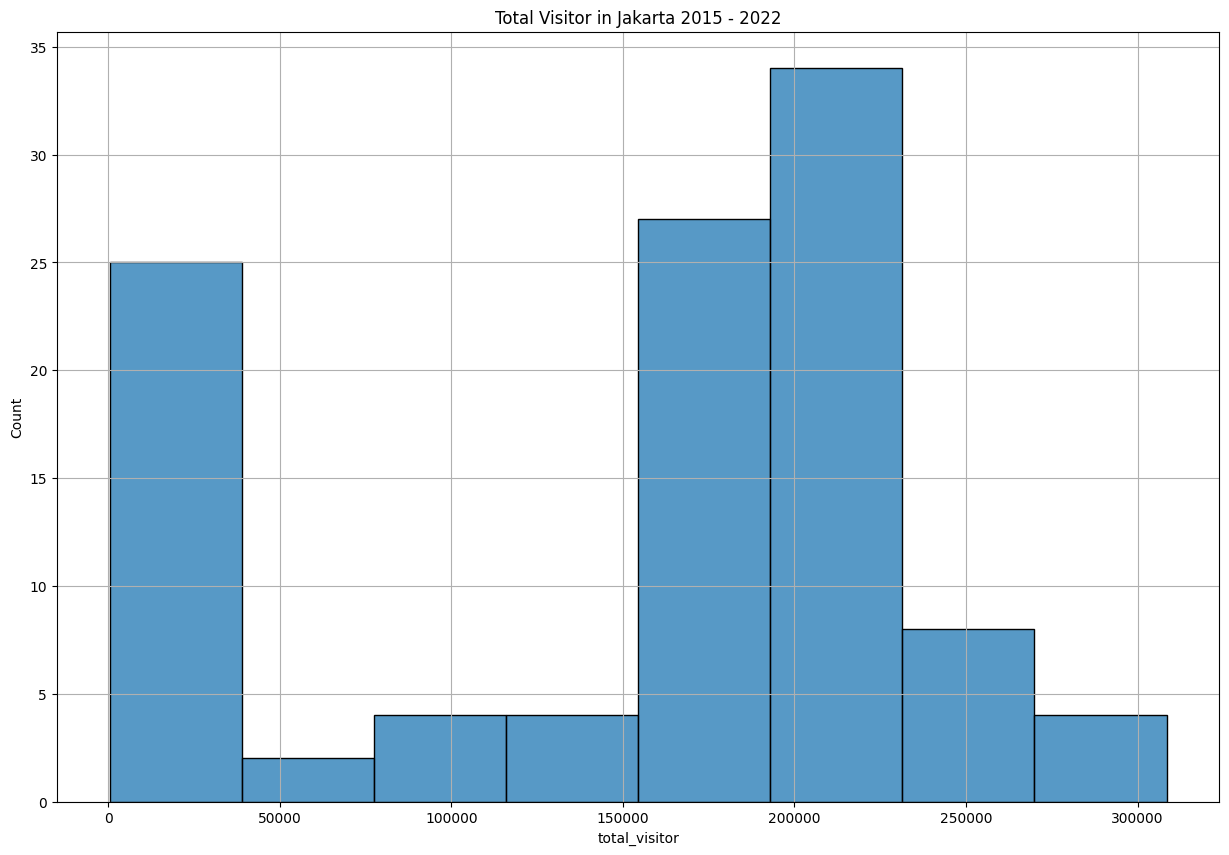

In [ ]:
# plot to see the total_visitor varience
plt.figure(figsize=(15, 10))
sns.histplot(data_gru['total_visitor'], kde=False)
plt.title("Total Visitor in Jakarta 2015 - 2022")
plt.grid()
plt.show()

## Data Preparation

In [ ]:
# set data index as datetime column
train_datetime = pd.to_datetime(data_gru.datetime)
data_gru = data_gru.set_index('datetime')
data_gru.head()

,total_visitor,total_accomodation
datetime,,
1/1/2014,193017,16332
2/1/2014,185851,17101
3/1/2014,204004,17438
4/1/2014,186373,17943
5/1/2014,190716,18123


In [ ]:
input_col = list(data_gru)[0:2]
print(input_col)

['total_visitor', 'total_accomodation']


In [ ]:
data_for_training = data_gru[input_col].astype(float)

In [ ]:
scaler = MinMaxScaler()
scaler = scaler.fit(data_for_training)
scaled_data_train = scaler.transform(data_for_training)

## Scenario 1

80% Train - 20% Test

In [ ]:
# Define sequence length and features
sequence_length = 12  # Karena data terdiri dari data perbulan dalam satu tahun
num_features = len(data_gru.columns)

# Create sequences and corresponding labels
sequences = []
labels = []
for i in range(len(scaled_data_train) - sequence_length):
    seq = scaled_data_train[i:i+sequence_length]
    label = scaled_data_train[i+sequence_length][1]
    sequences.append(seq)
    labels.append(label)

# Convert to numpy arrays
sequences = np.array(sequences)
labels = np.array(labels)

# Split into train and test sets
train_x, test_x, train_y, test_y = train_test_split(sequences,labels, test_size=0.2)

print("Train X shape:", train_x.shape)
print("Train Y shape:", train_y.shape)
print("Test X shape:", test_x.shape)
print("Test Y shape:", test_y.shape)

Train X shape: (76, 12, 2)
Train Y shape: (76,)
Test X shape: (20, 12, 2)
Test Y shape: (20,)


In [ ]:
# Create the GRU model
model = Sequential()

# Add GRU Layer with dropout
model.add(GRU(units=256, activation = 'tanh', input_shape=(train_x.shape[1], train_x.shape[2]), return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=128, activation = 'tanh', return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=64, activation = 'tanh', return_sequences=False))

# Add a dense output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_6 (GRU)                 (None, 12, 256)           199680    
                                                                 
 dropout_4 (Dropout)         (None, 12, 256)           0         
                                                                 
 gru_7 (GRU)                 (None, 12, 128)           148224    
                                                                 
 dropout_5 (Dropout)         (None, 12, 128)           0         
                                                                 
 gru_8 (GRU)                 (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 385217 (1.47 MB)
Trainable params: 38521

In [ ]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_x, train_y,
    epochs=100,
    batch_size=64,
    validation_split=0.2,  # Use part of the training data as validation
    callbacks=[early_stopping]
)

Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 0.3970 - val_loss: 0.0636
Epoch 2/100
1/1 [==============================] - 0s 78ms/step - loss: 0.1211 - val_loss: 0.0459
Epoch 3/100
1/1 [==============================] - 0s 75ms/step - loss: 0.0456 - val_loss: 0.0961
Epoch 4/100
1/1 [==============================] - 0s 85ms/step - loss: 0.0743 - val_loss: 0.0474
Epoch 5/100
1/1 [==============================] - 0s 77ms/step - loss: 0.0421 - val_loss: 0.0028
Epoch 6/100
1/1 [==============================] - 0s 77ms/step - loss: 0.0062 - val_loss: 0.0138
Epoch 7/100
1/1 [==============================] - 0s 79ms/step - loss: 0.0115 - val_loss: 0.0432
Epoch 8/100
1/1 [==============================] - 0s 82ms/step - loss: 0.0324 - val_loss: 0.0516
Epoch 9/100
1/1 [==============================] - 0s 73ms/step - loss: 0.0387 - val_loss: 0.0379
Epoch 10/100
1/1 [==============================] - 0s 78ms/step - loss: 0.0299 - val_loss: 0.0173


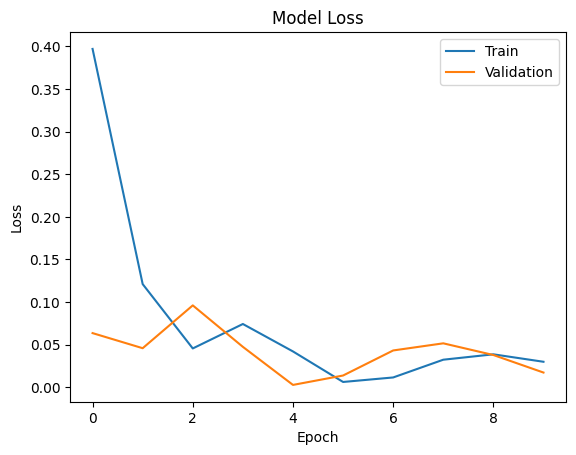

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# Predict for 12 month afterwards
n_past = 1
n_month_for_prediction = 12
predict_period_month = pd.date_range(list(train_datetime)[-n_past], periods=n_month_for_prediction, freq='M').tolist()
print(predict_period_month)

[Timestamp('2022-12-31 00:00:00', freq='M'), Timestamp('2023-01-31 00:00:00', freq='M'), Timestamp('2023-02-28 00:00:00', freq='M'), Timestamp('2023-03-31 00:00:00', freq='M'), Timestamp('2023-04-30 00:00:00', freq='M'), Timestamp('2023-05-31 00:00:00', freq='M'), Timestamp('2023-06-30 00:00:00', freq='M'), Timestamp('2023-07-31 00:00:00', freq='M'), Timestamp('2023-08-31 00:00:00', freq='M'), Timestamp('2023-09-30 00:00:00', freq='M'), Timestamp('2023-10-31 00:00:00', freq='M'), Timestamp('2023-11-30 00:00:00', freq='M')]


In [ ]:
# Print the error metrics
predictions = model.predict(train_x[-n_month_for_prediction:])
mse = mean_squared_error(train_y[-n_month_for_prediction:], predictions)
rmse = np.sqrt(mse)
r2 = r2_score(train_y[-n_month_for_prediction:], predictions)
mae = mean_absolute_error(train_y[-n_month_for_prediction:], predictions)
mape = mean_absolute_percentage_error(train_y[-n_month_for_prediction:], predictions)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)
print("MAE:", mae)
print("MAPE:", mape)

1/1 [==============================] - 1s 663ms/step
MSE: 0.0030883683607023826
RMSE: 0.05557309025690746
R2: 0.9547719167792932
MAE: 0.051805965998388104
MAPE: 0.15878685138508877


In [ ]:
prediction_copies = np.repeat(predictions, data_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

<ipython-input-38-21cd494a37c1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['datetime'] = pd.to_datetime(original['datetime'])


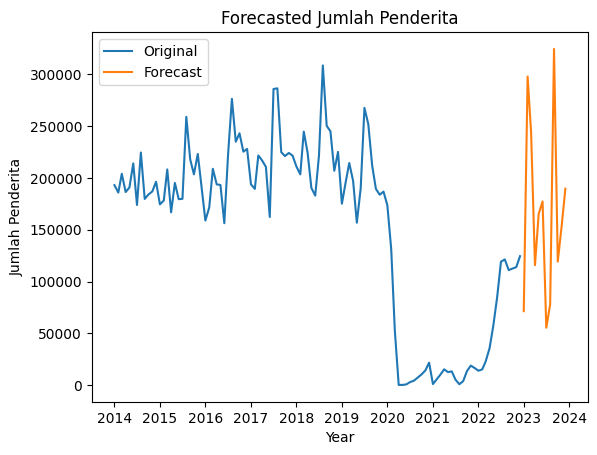

╒═════════════════════╤══════════════╕
│ Date                │   Prediction │
╞═════════════════════╪══════════════╡
│ 2023-01-01 00:00:00 │      71539.5 │
├─────────────────────┼──────────────┤
│ 2023-02-01 00:00:00 │     297725   │
├─────────────────────┼──────────────┤
│ 2023-03-01 00:00:00 │     243934   │
├─────────────────────┼──────────────┤
│ 2023-04-01 00:00:00 │     115840   │
├─────────────────────┼──────────────┤
│ 2023-05-01 00:00:00 │     165352   │
├─────────────────────┼──────────────┤
│ 2023-06-01 00:00:00 │     177314   │
├─────────────────────┼──────────────┤
│ 2023-07-01 00:00:00 │      55550.1 │
├─────────────────────┼──────────────┤
│ 2023-08-01 00:00:00 │      78083.8 │
├─────────────────────┼──────────────┤
│ 2023-09-01 00:00:00 │     324363   │
├─────────────────────┼──────────────┤
│ 2023-10-01 00:00:00 │     119288   │
├─────────────────────┼──────────────┤
│ 2023-11-01 00:00:00 │     153302   │
├─────────────────────┼──────────────┤
│ 2023-12-01 00:00:00 │  

In [ ]:
forecast_dates = []

for time_i in predict_period_month:
    forecast_dates.append(time_i.date())

df_forecast = pd.DataFrame({'Date': forecast_dates, 'total_visitor': y_pred_future})
df_forecast['Date'] = pd.to_datetime(df_forecast['Date'])

# Assuming 'original' contains the original data with 'datetime' and 'total_visitor' columns
original = data_asli[['datetime', 'total_visitor']]
original['datetime'] = pd.to_datetime(original['datetime'])
original = original.loc[original['datetime'] >= '2013-01-01']

sns.lineplot(data=original, x='datetime', y='total_visitor', label='Original')
sns.lineplot(data=df_forecast, x='Date', y='total_visitor', label='Forecast')

plt.xlabel('Year')
plt.ylabel('Jumlah Penderita')
plt.title('Forecasted Jumlah Penderita')
plt.legend()
plt.show()

# Generate the forecast dates from January 2023 to December 2023
forecast_dates_1 = pd.date_range(start='2023-01-01', end='2023-12-01', freq='MS')

# Create a list of forecast dates and prediction values
data = list(zip(forecast_dates_1, y_pred_future))

# Create a list of headers for the table
headers = ['Date', 'Prediction']
table = tabulate(data, headers=headers, tablefmt='fancy_grid')
# Print the table
print(table)

## Scenario 2

70% Train - 30% Test

In [ ]:
# Define sequence length and features
sequence_length = 12  # Karena data terdiri dari data perbulan dalam satu tahun
num_features = len(data_gru.columns)

# Create sequences and corresponding labels
sequences = []
labels = []
for i in range(len(scaled_data_train) - sequence_length):
    seq = scaled_data_train[i:i+sequence_length]
    label = scaled_data_train[i+sequence_length][1]
    sequences.append(seq)
    labels.append(label)

# Convert to numpy arrays
sequences = np.array(sequences)
labels = np.array(labels)

# Split into train and test sets
train_x_2, test_x_2, train_y_2, test_y_2 = train_test_split(sequences,labels, test_size=0.3)

print("Train X shape:", train_x_2.shape)
print("Train Y shape:", train_y_2.shape)
print("Test X shape:", test_x_2.shape)
print("Test Y shape:", test_y_2.shape)

Train X shape: (67, 12, 2)
Train Y shape: (67,)
Test X shape: (29, 12, 2)
Test Y shape: (29,)


In [ ]:
# Create the GRU model
model2 = Sequential()

# Add LSTMlayers with dropout
model2.add(GRU(units=256, activation = 'tanh', input_shape=(train_x_2.shape[1], train_x_2.shape[2]), return_sequences=True))
model2.add(Dropout(0.2))

model2.add(GRU(units=128, activation = 'tanh', return_sequences=True))
model2.add(Dropout(0.2))

model2.add(GRU(units=64, activation = 'tanh', return_sequences=False))

# Add a dense output layer
model2.add(Dense(units=1))

# Compile the model
model2.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model2.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_48 (GRU)                (None, 12, 256)           199680    
                                                                 
 dropout_32 (Dropout)        (None, 12, 256)           0         
                                                                 
 gru_49 (GRU)                (None, 12, 128)           148224    
                                                                 
 dropout_33 (Dropout)        (None, 12, 128)           0         
                                                                 
 gru_50 (GRU)                (None, 64)                37248     
                                                                 
 dense_16 (Dense)            (None, 1)                 65        
                                                                 
Total params: 385217 (1.47 MB)
Trainable params: 3852

In [ ]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history2 = model2.fit(
    train_x_2, train_y_2,
    epochs=100,
    batch_size=64,
    validation_split=0.2,  # Use part of the training data as validation
    callbacks=[early_stopping]
)

Epoch 1/100
1/1 [==============================] - 6s 6s/step - loss: 0.3875 - val_loss: 0.2191
Epoch 2/100
1/1 [==============================] - 0s 82ms/step - loss: 0.1653 - val_loss: 0.0823
Epoch 3/100
1/1 [==============================] - 0s 78ms/step - loss: 0.0548 - val_loss: 0.0491
Epoch 4/100
1/1 [==============================] - 0s 75ms/step - loss: 0.0523 - val_loss: 0.0557
Epoch 5/100
1/1 [==============================] - 0s 82ms/step - loss: 0.0683 - val_loss: 0.0274
Epoch 6/100
1/1 [==============================] - 0s 78ms/step - loss: 0.0341 - val_loss: 0.0036
Epoch 7/100
1/1 [==============================] - 0s 72ms/step - loss: 0.0039 - val_loss: 0.0051
Epoch 8/100
1/1 [==============================] - 0s 79ms/step - loss: 0.0061 - val_loss: 0.0177
Epoch 9/100
1/1 [==============================] - 0s 75ms/step - loss: 0.0224 - val_loss: 0.0230
Epoch 10/100
1/1 [==============================] - 0s 73ms/step - loss: 0.0267 - val_loss: 0.0183
Epoch 11/100
1/1 [===

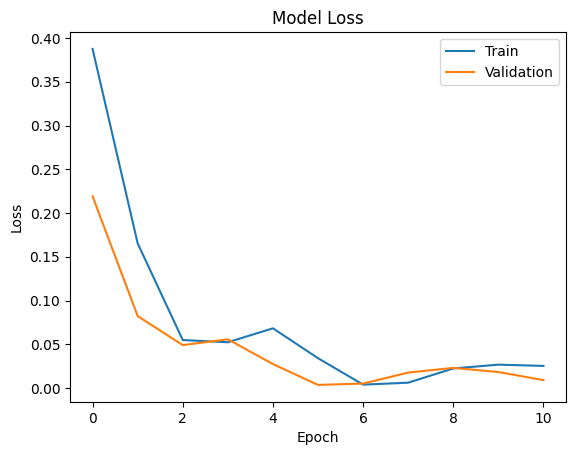

In [ ]:
# Plot training & validation loss values
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# Predict for 12 month afterwards
n_past = 1
n_month_for_prediction = 12
predict_period_month = pd.date_range(list(train_datetime)[-n_past], periods=n_month_for_prediction, freq='M').tolist()
print(predict_period_month)

[Timestamp('2022-12-31 00:00:00', freq='M'), Timestamp('2023-01-31 00:00:00', freq='M'), Timestamp('2023-02-28 00:00:00', freq='M'), Timestamp('2023-03-31 00:00:00', freq='M'), Timestamp('2023-04-30 00:00:00', freq='M'), Timestamp('2023-05-31 00:00:00', freq='M'), Timestamp('2023-06-30 00:00:00', freq='M'), Timestamp('2023-07-31 00:00:00', freq='M'), Timestamp('2023-08-31 00:00:00', freq='M'), Timestamp('2023-09-30 00:00:00', freq='M'), Timestamp('2023-10-31 00:00:00', freq='M'), Timestamp('2023-11-30 00:00:00', freq='M')]


In [ ]:
# Print the error metrics
predictions2 = model2.predict(train_x_2[-n_month_for_prediction:])
mse2 = mean_squared_error(train_y_2[-n_month_for_prediction:], predictions2)
rmse2 = np.sqrt(mse2)
r2_2 = r2_score(train_y_2[-n_month_for_prediction:], predictions2)
mae2 = mean_absolute_error(train_y_2[-n_month_for_prediction:], predictions2)
mape2 = mean_absolute_percentage_error(train_y_2[-n_month_for_prediction:], predictions2)

print("MSE:", mse2)
print("RMSE:", rmse2)
print("R2:", r2_2)
print("MAE:", mae2)
print("MAPE:", mape2)

1/1 [==============================] - 1s 813ms/step
MSE: 0.0030625915497541328
RMSE: 0.05534068620602868
R2: 0.9631813783413892
MAE: 0.042623719426379186
MAPE: 0.18744415364441055


In [ ]:
prediction_copies_2 = np.repeat(predictions2, data_for_training.shape[1], axis=-1)
y_pred_future_2 = scaler.inverse_transform(prediction_copies_2)[:,0]

<ipython-input-180-b4eb0f7fe55b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original2['datetime'] = pd.to_datetime(original2['datetime'])


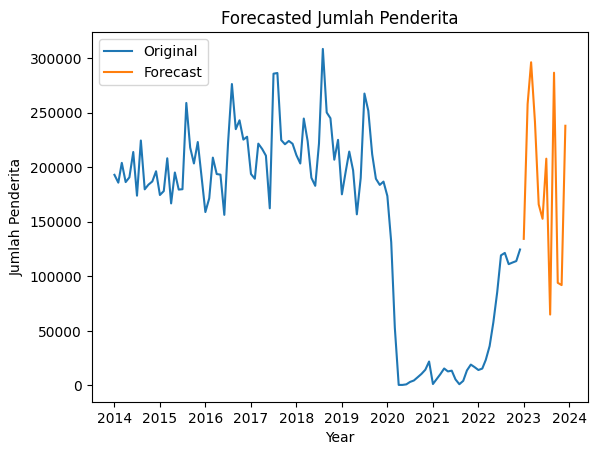

╒═════════════════════╤══════════════╕
│ Date                │   Prediction │
╞═════════════════════╪══════════════╡
│ 2023-01-01 00:00:00 │      71539.5 │
├─────────────────────┼──────────────┤
│ 2023-02-01 00:00:00 │     297725   │
├─────────────────────┼──────────────┤
│ 2023-03-01 00:00:00 │     243934   │
├─────────────────────┼──────────────┤
│ 2023-04-01 00:00:00 │     115840   │
├─────────────────────┼──────────────┤
│ 2023-05-01 00:00:00 │     165352   │
├─────────────────────┼──────────────┤
│ 2023-06-01 00:00:00 │     177314   │
├─────────────────────┼──────────────┤
│ 2023-07-01 00:00:00 │      55550.1 │
├─────────────────────┼──────────────┤
│ 2023-08-01 00:00:00 │      78083.8 │
├─────────────────────┼──────────────┤
│ 2023-09-01 00:00:00 │     324363   │
├─────────────────────┼──────────────┤
│ 2023-10-01 00:00:00 │     119288   │
├─────────────────────┼──────────────┤
│ 2023-11-01 00:00:00 │     153302   │
├─────────────────────┼──────────────┤
│ 2023-12-01 00:00:00 │  

In [ ]:
forecast_dates = []

for time_i in predict_period_month:
    forecast_dates.append(time_i.date())

df_forecast_2 = pd.DataFrame({'Date': forecast_dates, 'total_visitor': y_pred_future_2})
df_forecast_2['Date'] = pd.to_datetime(df_forecast_2['Date'])

# Assuming 'original' contains the original data with 'datetime' and 'total_visitor' columns
original2 = data_asli[['datetime', 'total_visitor']]
original2['datetime'] = pd.to_datetime(original2['datetime'])
original2 = original.loc[original2['datetime'] >= '2013-01-01']

sns.lineplot(data=original2, x='datetime', y='total_visitor', label='Original')
sns.lineplot(data=df_forecast_2, x='Date', y='total_visitor', label='Forecast')

plt.xlabel('Year')
plt.ylabel('Jumlah Penderita')
plt.title('Forecasted Jumlah Penderita')
plt.legend()
plt.show()

# Generate the forecast dates from January 2023 to December 2023
forecast_dates_1 = pd.date_range(start='2023-01-01', end='2023-12-01', freq='MS')

# Create a list of forecast dates and prediction values
data2 = list(zip(forecast_dates_1, y_pred_future))

# Create a list of headers for the table
headers = ['Date', 'Prediction']
table2 = tabulate(data2, headers=headers, tablefmt='fancy_grid')
# Print the table
print(table2)

## Scenario 3

60% Train - 40% Test

In [ ]:
# Define sequence length and features
sequence_length = 12  # Karena data terdiri dari data perbulan dalam satu tahun
num_features = len(data_gru.columns)

# Create sequences and corresponding labels
sequences = []
labels = []
for i in range(len(scaled_data_train) - sequence_length):
    seq = scaled_data_train[i:i+sequence_length]
    label = scaled_data_train[i+sequence_length][1]
    sequences.append(seq)
    labels.append(label)

# Convert to numpy arrays
sequences = np.array(sequences)
labels = np.array(labels)

# Split into train and test sets
train_x_3, test_x_3, train_y_3, test_y_3 = train_test_split(sequences,labels, test_size=0.4)

print("Train X shape:", train_x_3.shape)
print("Train Y shape:", train_y_3.shape)
print("Test X shape:", test_x_3.shape)
print("Test Y shape:", test_y_3.shape)

Train X shape: (57, 12, 2)
Train Y shape: (57,)
Test X shape: (39, 12, 2)
Test Y shape: (39,)


In [ ]:
# Create the GRU model
model3 = Sequential()

# Add LSTM layers with dropout
model3.add(GRU(units=256, activation = 'tanh', input_shape=(train_x_3.shape[1], train_x_3.shape[2]), return_sequences=True))
model3.add(Dropout(0.2))

model3.add(GRU(units=128, activation = 'tanh', return_sequences=True))
model3.add(Dropout(0.2))

model3.add(GRU(units=64, activation = 'tanh', return_sequences=False))

# Add a dense output layer
model3.add(Dense(units=1))

# Compile the model
model3.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model3.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_51 (GRU)                (None, 12, 256)           199680    
                                                                 
 dropout_34 (Dropout)        (None, 12, 256)           0         
                                                                 
 gru_52 (GRU)                (None, 12, 128)           148224    
                                                                 
 dropout_35 (Dropout)        (None, 12, 128)           0         
                                                                 
 gru_53 (GRU)                (None, 64)                37248     
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 385217 (1.47 MB)
Trainable params: 3852

In [ ]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history3 = model3.fit(
    train_x_3, train_y_3,
    epochs=100,
    batch_size=64,
    validation_split=0.2,  # Use part of the training data as validation
    callbacks=[early_stopping]
)

Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 0.2301 - val_loss: 0.0594
Epoch 2/100
1/1 [==============================] - 0s 189ms/step - loss: 0.0469 - val_loss: 0.0651
Epoch 3/100
1/1 [==============================] - 0s 151ms/step - loss: 0.0823 - val_loss: 0.0374
Epoch 4/100
1/1 [==============================] - 0s 147ms/step - loss: 0.0481 - val_loss: 0.0021
Epoch 5/100
1/1 [==============================] - 0s 167ms/step - loss: 0.0059 - val_loss: 0.0087
Epoch 6/100
1/1 [==============================] - 0s 158ms/step - loss: 0.0062 - val_loss: 0.0295
Epoch 7/100
1/1 [==============================] - 0s 84ms/step - loss: 0.0283 - val_loss: 0.0335
Epoch 8/100
1/1 [==============================] - 0s 134ms/step - loss: 0.0299 - val_loss: 0.0227
Epoch 9/100
1/1 [==============================] - 0s 131ms/step - loss: 0.0225 - val_loss: 0.0097


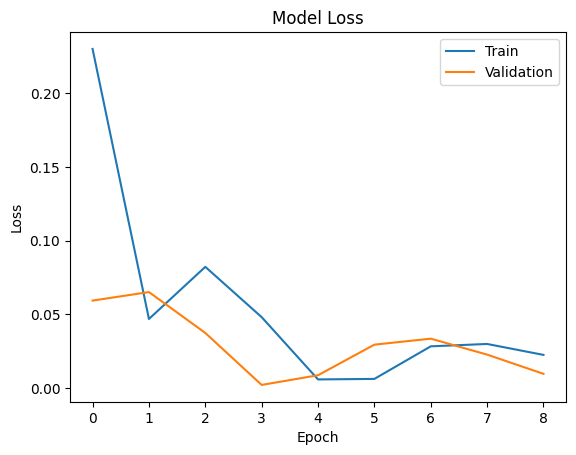

In [ ]:
# Plot training & validation loss values
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# Predict for 12 month afterwards
n_past = 1
n_month_for_prediction = 12
predict_period_month = pd.date_range(list(train_datetime)[-n_past], periods=n_month_for_prediction, freq='M').tolist()
print(predict_period_month)

[Timestamp('2022-12-31 00:00:00', freq='M'), Timestamp('2023-01-31 00:00:00', freq='M'), Timestamp('2023-02-28 00:00:00', freq='M'), Timestamp('2023-03-31 00:00:00', freq='M'), Timestamp('2023-04-30 00:00:00', freq='M'), Timestamp('2023-05-31 00:00:00', freq='M'), Timestamp('2023-06-30 00:00:00', freq='M'), Timestamp('2023-07-31 00:00:00', freq='M'), Timestamp('2023-08-31 00:00:00', freq='M'), Timestamp('2023-09-30 00:00:00', freq='M'), Timestamp('2023-10-31 00:00:00', freq='M'), Timestamp('2023-11-30 00:00:00', freq='M')]


In [ ]:
# Print the error metrics
predictions3 = model3.predict(train_x_3[-n_month_for_prediction:])
mse3 = mean_squared_error(train_y_3[-n_month_for_prediction:], predictions3)
rmse3 = np.sqrt(mse3)
r2_3 = r2_score(train_y_3[-n_month_for_prediction:], predictions3)
mae3 = mean_absolute_error(train_y_3[-n_month_for_prediction:], predictions3)
mape3 = mean_absolute_percentage_error(train_y_3[-n_month_for_prediction:], predictions3)

print("MSE:", mse3)
print("RMSE:", rmse3)
print("R2:", r2_3)
print("MAE:", mae3)
print("MAPE:", mape3)

1/1 [==============================] - 1s 697ms/step
MSE: 0.0021353077224175662
RMSE: 0.0462093899810154
R2: 0.9554839371981668
MAE: 0.03927661215008777
MAPE: 0.08369642121163352


In [ ]:
prediction_copies_3 = np.repeat(predictions3, data_for_training.shape[1], axis=-1)
y_pred_future_3 = scaler.inverse_transform(prediction_copies_3)[:,0]

<ipython-input-181-44bcb59e5d30>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original3['datetime'] = pd.to_datetime(original3['datetime'])


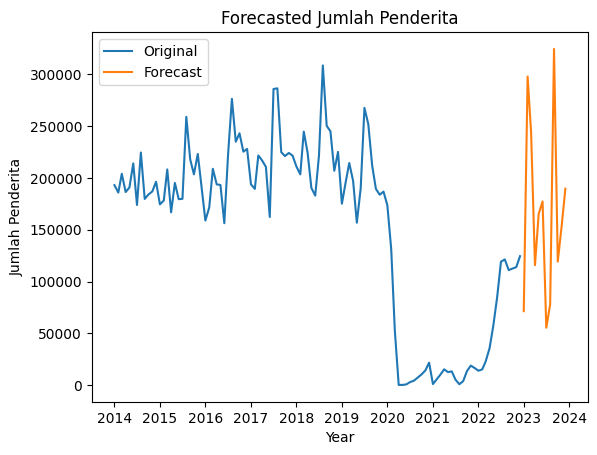

╒═════════════════════╤══════════════╕
│ Date                │   Prediction │
╞═════════════════════╪══════════════╡
│ 2023-01-01 00:00:00 │      71539.5 │
├─────────────────────┼──────────────┤
│ 2023-02-01 00:00:00 │     297725   │
├─────────────────────┼──────────────┤
│ 2023-03-01 00:00:00 │     243934   │
├─────────────────────┼──────────────┤
│ 2023-04-01 00:00:00 │     115840   │
├─────────────────────┼──────────────┤
│ 2023-05-01 00:00:00 │     165352   │
├─────────────────────┼──────────────┤
│ 2023-06-01 00:00:00 │     177314   │
├─────────────────────┼──────────────┤
│ 2023-07-01 00:00:00 │      55550.1 │
├─────────────────────┼──────────────┤
│ 2023-08-01 00:00:00 │      78083.8 │
├─────────────────────┼──────────────┤
│ 2023-09-01 00:00:00 │     324363   │
├─────────────────────┼──────────────┤
│ 2023-10-01 00:00:00 │     119288   │
├─────────────────────┼──────────────┤
│ 2023-11-01 00:00:00 │     153302   │
├─────────────────────┼──────────────┤
│ 2023-12-01 00:00:00 │  

In [ ]:
forecast_dates = []

for time_i in predict_period_month:
    forecast_dates.append(time_i.date())

df_forecast_3 = pd.DataFrame({'Date': forecast_dates, 'total_visitor': y_pred_future_3})
df_forecast_3['Date'] = pd.to_datetime(df_forecast_3['Date'])

# Assuming 'original' contains the original data with 'datetime' and 'total_visitor' columns
original3 = data_asli[['datetime', 'total_visitor']]
original3['datetime'] = pd.to_datetime(original3['datetime'])
original3 = original.loc[original3['datetime'] >= '2013-01-01']

sns.lineplot(data=original3, x='datetime', y='total_visitor', label='Original')
sns.lineplot(data=df_forecast, x='Date', y='total_visitor', label='Forecast')

plt.xlabel('Year')
plt.ylabel('Jumlah Penderita')
plt.title('Forecasted Jumlah Penderita')
plt.legend()
plt.show()

# Generate the forecast dates from January 2023 to December 2023
forecast_dates_1 = pd.date_range(start='2023-01-01', end='2023-12-01', freq='MS')

# Create a list of forecast dates and prediction values
data3 = list(zip(forecast_dates_1, y_pred_future))

# Create a list of headers for the table
headers = ['Date', 'Prediction']
table3 = tabulate(data3, headers=headers, tablefmt='fancy_grid')
# Print the table
print(table3)

## Conclusion

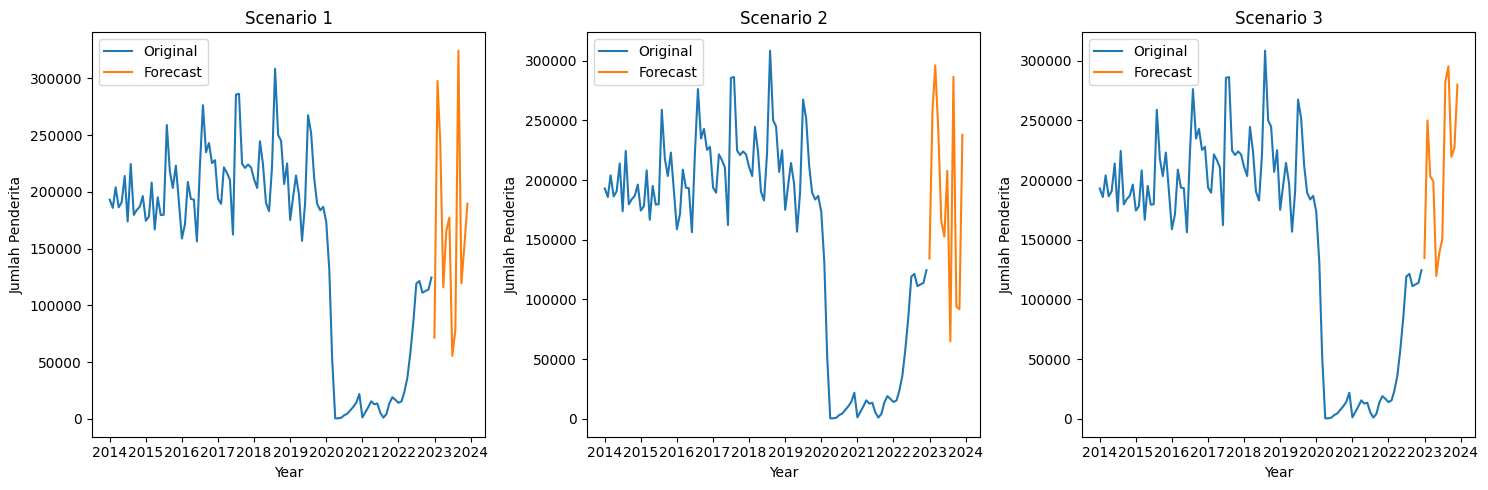

╒════════════╤═════════╤════════════╤═══════════╤═══════════╤═══════════╤══════════╕
│ Scenario   │ Model   │        MSE │      MAPE │       MAE │      RMSE │       R2 │
╞════════════╪═════════╪════════════╪═══════════╪═══════════╪═══════════╪══════════╡
│ Scenario 1 │ GRU     │ 0.00353303 │ 0.0856239 │ 0.0548102 │ 0.0594393 │ 0.926345 │
├────────────┼─────────┼────────────┼───────────┼───────────┼───────────┼──────────┤
│ Scenario 2 │ GRU     │ 0.00306259 │ 0.187444  │ 0.0426237 │ 0.0553407 │ 0.963181 │
├────────────┼─────────┼────────────┼───────────┼───────────┼───────────┼──────────┤
│ Scenario 3 │ GRU     │ 0.00213531 │ 0.0836964 │ 0.0392766 │ 0.0462094 │ 0.955484 │
╘════════════╧═════════╧════════════╧═══════════╧═══════════╧═══════════╧══════════╛


In [ ]:
plt.figure(figsize=(15, 5))

# Scenario 1
plt.subplot(1, 3, 1)
sns.lineplot(data=original, x='datetime', y='total_visitor', label='Original')
sns.lineplot(data=df_forecast, x='Date', y='total_visitor', label='Forecast')
plt.xlabel('Year')
plt.ylabel('Jumlah Penderita')
plt.title('Scenario 1')
plt.legend()

# Scenario 2
plt.subplot(1, 3, 2)
sns.lineplot(data=original, x='datetime', y='total_visitor', label='Original')
sns.lineplot(data=df_forecast_2, x='Date', y='total_visitor', label='Forecast')
plt.xlabel('Year')
plt.ylabel('Jumlah Penderita')
plt.title('Scenario 2')
plt.legend()

# Scenario 3
plt.subplot(1, 3, 3)
sns.lineplot(data=original, x='datetime', y='total_visitor', label='Original')
sns.lineplot(data=df_forecast_3 , x='Date', y='total_visitor', label='Forecast')
plt.xlabel('Year')
plt.ylabel('Jumlah Penderita')
plt.title('Scenario 3')
plt.legend()

plt.tight_layout()
plt.show()

# Define the data for each scenario
scenario_data = [
    {
        'Scenario': 'Scenario 1',
        'Model': 'GRU',
        'MSE': mse,
        'MAPE': mape,
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2
    },
    {
        'Scenario': 'Scenario 2',
        'Model': 'GRU',
        'MSE': mse2,
        'MAPE': mape2,
        'MAE': mae2,
        'RMSE': rmse2,
        'R2': r2_2
    },
    {
        'Scenario': 'Scenario 3',
        'Model': 'GRU',
        'MSE': mse3,
        'MAPE': mape3,
        'MAE': mae3,
        'RMSE': rmse3,
        'R2': r2_3
    }
]

# Create a DataFrame from the scenario data
df = pd.DataFrame(scenario_data)

# Convert DataFrame to a list of rows
rows = df.values.tolist()

# Create a list of headers
headers = df.columns.tolist()

# Generate the table
table4 = tabulate(rows, headers=headers, tablefmt='fancy_grid')

# Print the table
print(table4)
